# WeatherPy

## Analysis
* The temperature increases significantly as one approaches the equator (0 Deg. Latitude).  However, the temperature in the southern hemisphere tends to be higher in this time of year than the northern hemisphere.
* There is no strong relationship between latitude and cloudiness.  Some cities have cloudiness at 0% or 100%.
* There is no strong relationship between latitude and humidity.  Some cities have humidity above 90%.
* There is no strong relationship between latitude and wind speed.  Some cities have wind speed above 20 mph.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it is being processed (with the city number and city name)

In [3]:
# Create lists for storing city weather data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng =  []
max_temp = []
wind_speed = []

# Set counter variables. Each city set includes up to 50 city records.
city_set = 1
city_record = 1

# Start data retrieval
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through list of cities
for city in cities:
 
    try:   
        
        print(f"Processing Record {city_record} of Set {city_set} | {city}")
        
        # Alter city set and/or city record counters 
        if city_record < 50:
            city_record +=1

        else:
            city_record = 1
            city_set += 1
            
            # OpenWeatherMap API free account only allows 60 requests per minute. Pause the loop for 60 seconds after each set.
            time.sleep(60)
        
        # Create base url that calls for weather search and brings back results in JSON
        target_url = "http://api.openweathermap.org/data/2.5/weather?q="+city+"&units=imperial&APPID="+api_key
        request = requests.get(target_url).json()       
        
        # Retreive data and append to lists
        city_name.append(request["name"])
        cloudiness.append(request["clouds"]["all"])
        country.append(request["sys"]["country"])
        date.append(request["dt"])
        humidity.append(request["main"]["humidity"])
        lat.append(request["coord"]["lat"])
        lng.append(request["coord"]["lon"])
        max_temp.append(request["main"]["temp_max"])
        wind_speed.append(request["wind"]["speed"])
        
                
    except:
        # Print error message if city is not found
        print("City not found. Skipping...")        

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Reset counter variables
city_record = 1
city_set = 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | acin
City not found. Skipping...
Processing Record 4 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | maragogi
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | gedo
Processing Record 11 of Set 1 | lavrentiya
Processing Record 12 of Set 1 | sarangani
Processing Record 13 of Set 1 | kaura namoda
Processing Record 14 of Set 1 | normandin
Processing Record 15 of Set 1 | sisimiut
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | mana
Processing Record 21 of Set 1 | quatre cocos
Processing Record 22 of Set 1 | o

Processing Record 35 of Set 4 | buraydah
Processing Record 36 of Set 4 | belaya gora
Processing Record 37 of Set 4 | martil
Processing Record 38 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 39 of Set 4 | qaqortoq
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | sinnamary
Processing Record 42 of Set 4 | bandarbeyla
Processing Record 43 of Set 4 | vila franca do campo
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | atuona
Processing Record 46 of Set 4 | cadillac
Processing Record 47 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 48 of Set 4 | birao
Processing Record 49 of Set 4 | phalombe
Processing Record 50 of Set 4 | jinchang
Processing Record 1 of Set 5 | faanui
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | sompeta
Processing Record 4 of Set 5 | pottstown
Processing Record 5 of Set 5 | zhigansk
Processing Record 6 of Set 5 | asyut
Processing Record 7 of Set 5 | so

Processing Record 26 of Set 8 | rybachiy
Processing Record 27 of Set 8 | nyurba
Processing Record 28 of Set 8 | mucuri
Processing Record 29 of Set 8 | namtsy
Processing Record 30 of Set 8 | san quintin
Processing Record 31 of Set 8 | tsabong
Processing Record 32 of Set 8 | kotka
Processing Record 33 of Set 8 | katangli
Processing Record 34 of Set 8 | devarkonda
Processing Record 35 of Set 8 | deep river
Processing Record 36 of Set 8 | tuy hoa
Processing Record 37 of Set 8 | port antonio
Processing Record 38 of Set 8 | boden
Processing Record 39 of Set 8 | lakes entrance
Processing Record 40 of Set 8 | boa vista
Processing Record 41 of Set 8 | phatthalung
Processing Record 42 of Set 8 | cassilandia
Processing Record 43 of Set 8 | houma
Processing Record 44 of Set 8 | lashio
Processing Record 45 of Set 8 | harper
Processing Record 46 of Set 8 | kavaratti
Processing Record 47 of Set 8 | mentok
City not found. Skipping...
Processing Record 48 of Set 8 | damietta
Processing Record 49 of Set

Processing Record 11 of Set 12 | itarema
Processing Record 12 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 13 of Set 12 | kusti
City not found. Skipping...
Processing Record 14 of Set 12 | gongzhuling
Processing Record 15 of Set 12 | pospelikha
Processing Record 16 of Set 12 | dipkarpaz
City not found. Skipping...
Processing Record 17 of Set 12 | shizukuishi
Processing Record 18 of Set 12 | moreira sales
Processing Record 19 of Set 12 | havre-saint-pierre
Processing Record 20 of Set 12 | marcona
City not found. Skipping...
Processing Record 21 of Set 12 | sola
Processing Record 22 of Set 12 | tonj
City not found. Skipping...
Processing Record 23 of Set 12 | husavik
Processing Record 24 of Set 12 | sao jose da coroa grande
Processing Record 25 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 26 of Set 12 | richards bay
Processing Record 27 of Set 12 | phonhong
Processing Record 28 of Set 12 | shingu
Processing Record 29 of Set 12 | tezu
Processin

## Convert Raw Data to Dataframe
* Export the city data into a .csv.
* Display the DataFrame.

In [4]:
# Create city weather dataframe
city_weather_data_df = pd.DataFrame({
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

# Export city data to CSV
city_weather_data_df.to_csv("Output/city_weather_data.csv", encoding="utf-8", index=False, header=True)

# Count number of values
city_weather_data_df.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [5]:
# Read CSV and display dataframe
city_weather_csv = "Output/city_weather_data.csv"
city_weather_df = pd.read_csv(city_weather_csv)
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,90,US,1552525685,51,42.65,-73.75,42.01,3.36
1,Mataura,20,NZ,1552525207,65,-46.19,168.86,59.00,1.99
2,Ancud,20,CL,1552521600,76,-41.87,-73.83,53.60,8.05
3,Maragogi,68,BR,1552526261,100,-9.01,-35.22,76.79,2.73
4,Jamestown,0,AU,1552525545,94,-33.21,138.60,62.16,4.41


## Plotting the data
* Use proper labeling of the plots using plot titles (including date of analysis) and axe labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

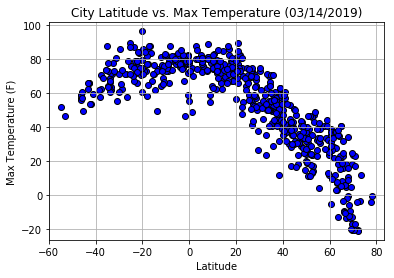

In [6]:
# Get latitude and temperature
city_latitude = city_weather_df.loc[:,"Lat"]
city_temperature = city_weather_df.loc[:,"Max Temp"]

# Get API call date
called_datetime = city_weather_df.loc[0,"Date"]
called_datetime = pd.to_datetime(called_datetime, unit="s")
called_date = pd.to_datetime(called_datetime).date()
called_date = called_date.strftime('%m/%d/%Y')

# Generate scatterplot
plt.scatter(city_latitude, city_temperature, marker="o", facecolors="blue", edgecolors="black")

# Set up limits for x-axis and y-axis
min_x = city_latitude.min()
min_y = city_temperature.min()
max_x = city_latitude.max()
max_y = city_temperature.max()

plt.ylim(min_y - 5, max_y + 5)
plt.xlim(min_x - 5, max_x + 5)

# Create title, gridlines, x label, and y label for the scatterplot
plt.title(f"City Latitude vs. Max Temperature ({called_date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(axis="both")

# Save the scatterplot
plt.savefig("Output/Latitude_Temperature_Scatterplot.png")

# Display the scatterplot
plt.show()

### Latitude vs. Humidity Plot

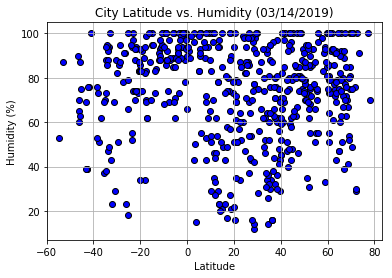

In [7]:
# Get latitude and humidity
city_latitude = city_weather_df.loc[:,"Lat"]
city_humidity = city_weather_df.loc[:,"Humidity"]

# Get API call date
called_datetime = city_weather_df.loc[0,"Date"]
called_datetime = pd.to_datetime(called_datetime, unit="s")
called_date = pd.to_datetime(called_datetime).date()
called_date = called_date.strftime('%m/%d/%Y')

# Generate scatterplot
plt.scatter(city_latitude, city_humidity, marker="o", facecolors="blue", edgecolors="black")

# Set up limits for x-axis and y-axis
min_x = city_latitude.min()
min_y = city_humidity.min()
max_x = city_latitude.max()
max_y = city_humidity.max()

plt.ylim(min_y - 5, max_y + 5)
plt.xlim(min_x - 5, max_x + 5)

# Create title, gridlines, x label, and y label for the scatterplot
plt.title(f"City Latitude vs. Humidity ({called_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(axis="both")

# Save the scatterplot
plt.savefig("Output/Latitude_Humidity_Scatterplot.png")

# Display the scatterplot
plt.show()

### Latitude vs. Cloudiness Plot

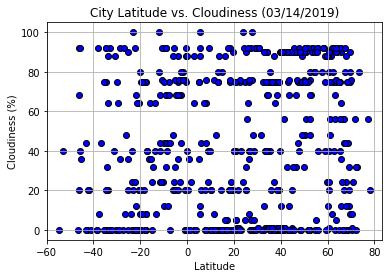

In [8]:
# Get latitude and cloudiness
city_latitude = city_weather_df.loc[:,"Lat"]
city_cloudiness = city_weather_df.loc[:,"Cloudiness"]

# Get API call date
called_datetime = city_weather_df.loc[0,"Date"]
called_datetime = pd.to_datetime(called_datetime, unit="s")
called_date = pd.to_datetime(called_datetime).date()
called_date = called_date.strftime('%m/%d/%Y')

# Generate scatterplot
plt.scatter(city_latitude, city_cloudiness, marker="o", facecolors="blue", edgecolors="black")

# Set up limits for x-axis and y-axis
min_x = city_latitude.min()
min_y = city_cloudiness.min()
max_x = city_latitude.max()
max_y = city_cloudiness.max()

plt.ylim(min_y - 5, max_y + 5)
plt.xlim(min_x - 5, max_x + 5)

# Create title, gridlines, x label, and y label for the scatterplot
plt.title(f"City Latitude vs. Cloudiness ({called_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(axis="both")

# Save the scatterplot
plt.savefig("Output/Latitude_Cloudiness_Scatterplot.png")

# Display the scatterplot
plt.show()

### Latitude vs. Wind Speed Plot

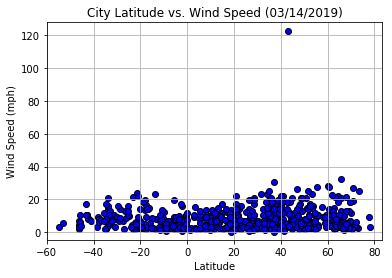

In [9]:
# Get latitude and wind speed
city_latitude = city_weather_df.loc[:,"Lat"]
city_wind_speed = city_weather_df.loc[:,"Wind Speed"]

# Get API call date
called_datetime = city_weather_df.loc[0,"Date"]
called_datetime = pd.to_datetime(called_datetime, unit="s")
called_date = pd.to_datetime(called_datetime).date()
called_date = called_date.strftime('%m/%d/%Y')

# Generate scatterplot
plt.scatter(city_latitude, city_wind_speed, marker="o", facecolors="blue", edgecolors="black")

# Set up limits for x-axis and y-axis
min_x = city_latitude.min()
min_y = city_wind_speed.min()
max_x = city_latitude.max()
max_y = city_wind_speed.max()

plt.ylim(min_y - 5, max_y + 5)
plt.xlim(min_x - 5, max_x + 5)

# Create title, gridlines, x label, and y label for the scatterplot
plt.title(f"City Latitude vs. Wind Speed ({called_date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(axis="both")

# Save the scatterplot
plt.savefig("Output/Latitude_Wind_Speed_Scatterplot.png")

# Display the scatterplot
plt.show()